# Turing Machine and Deep Learning

## Assignment 1: Preliminaries

This notebook is meant for you to review some mathematics to help your intuition when dealing with more complex models, and some hands on practice with `numpy` and `matplotlib` to review some programming skills. It also introduces you to some common ML lingo. This notebook must be in your GitHub directory by the deadline mentioned on Canvas.

### Handing in your Assignment

Git is an invaluable resource to researchers and developers, and thus for this course, all course material will be (additionally) shared on GitHub. Though there is a tiny bit of a learning curve, this is worth the effort. To hand in your assignment (applicable to all weeks):

1. Create a GitHub repository (this will be where you submit *all* homework assignments). Share the public link to this repository with us via
2. Create a folder called "Week 1" and copy this notebook and any other files or data that may be needed.
3. Finish the notebook and commit and push regularly. Your final commit before the deadline will be graded.


### Grading

Grading is based on effort and you can either obtain a pass or fail for the assignment.

## Question 1.1 -- Regression as minimization

Derive the closed form solution for ***a*** in a 1-dimensional linear regression as states as an optimization (minimization) problem. You may upload a handwritten scan/photograph, a screenshot of a text editor, or LaTeX notation directly.

- *Given*: $n$ input-output pairs of the form $$(x_i, y_i)$$
- *To find*: The coefficients of the line of best fit $$\hat{y_i} = a+bx_i$$
- *Loss function*: The sum of squared errors: $$f(Y, \hat{Y})=\sum_{i=0}^{n}(y_i-\hat{y}_i)^2$$
- ***b*** is found by taking partial derivates with respect to ***b*** and setting it to zero. This gives $$ b = \frac{\sum_{i=0}^{n}(x_i - \bar{x})(y_i-\bar{y})}{\sum_{i=0}^{n}(x_i - \bar{x})^2} $$
Note that in general, loss functions are the distance function *averaged over all data points in the set*. For now, you can ignore this point.

*Hint: Treat this as a regular minimization problem. Find where the partial derivates are zero of the error are with respect to the variables you wish to find.*

The third picture is part of exercise 1.2. The other pictures explain the derivation of a.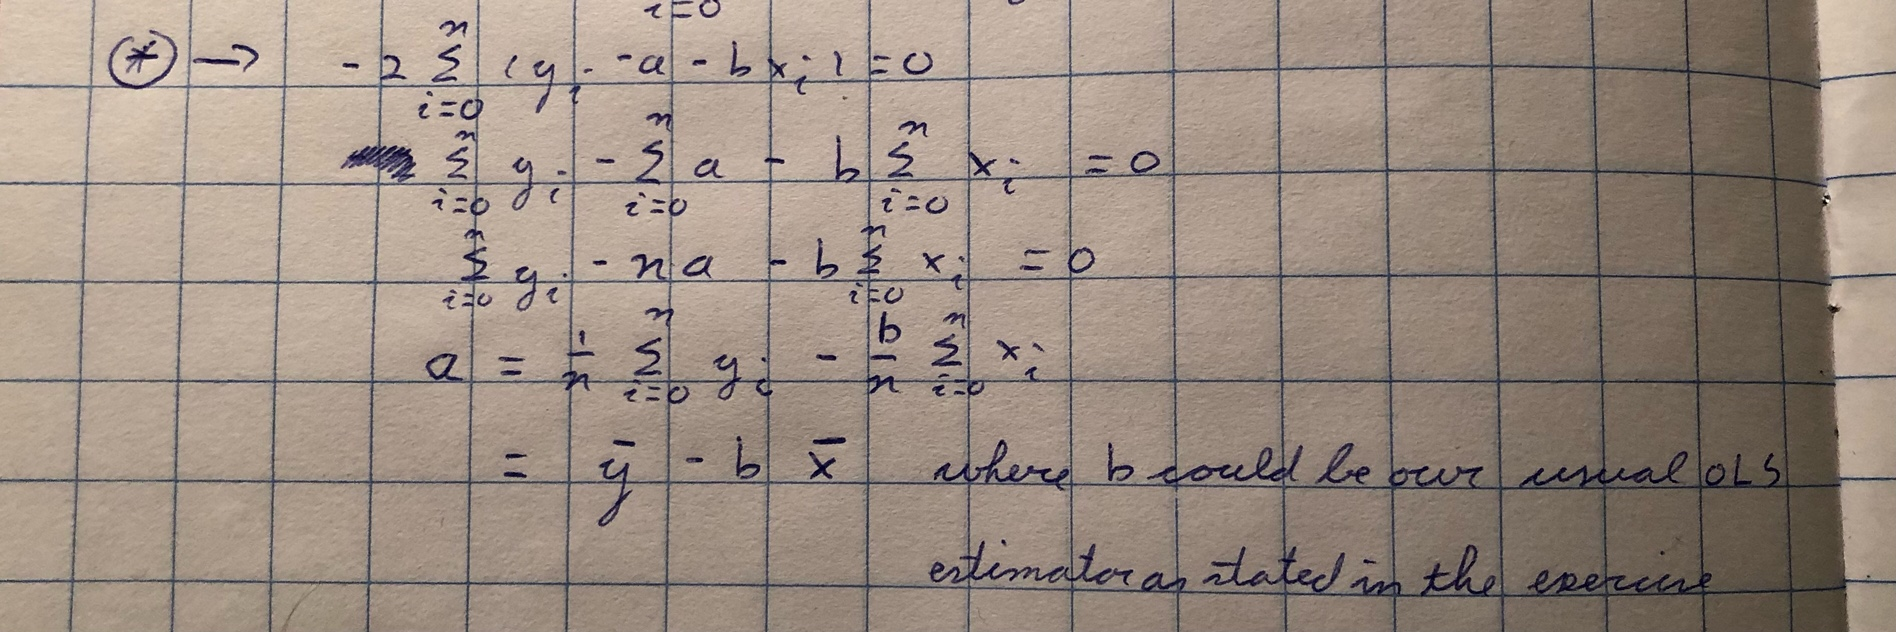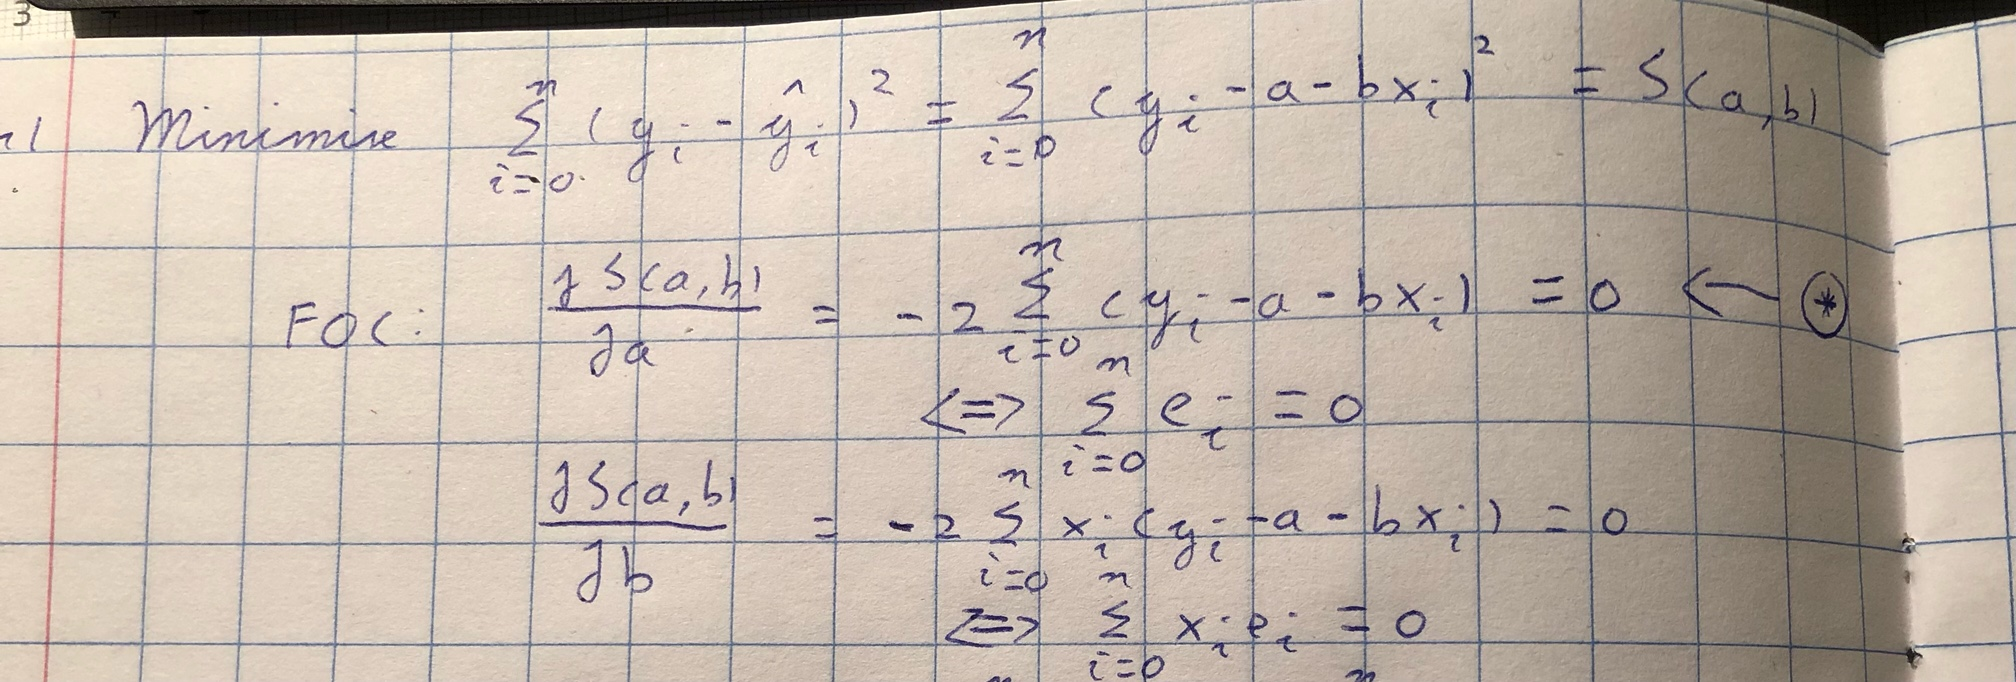*Add your answer here*!!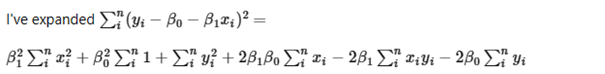

## Question 1.2 -- Function analysis

Is there only one unique solution for $a$ and $b$? Why/why not?

*Hint: Think of the shape of the loss function, a.k.a. the 'loss landscape'.*

When we rewrite our f(Y,Y^) = summation(yi-beta0-beta1xi)^2, we find the formula in the added image found at question 1.1. If taking second order derivative of this function is always positive, then we found a minima. We must here look at the hessian matrix thus we must compute 4 derivatives. If the hessian matrix is positive definite we found a global minimum. Since here the negative terms always drop after taking 2 derivatives, we can say that the hessian matrix is at least positive and thus the function is a global minima at a and b and thus they are unique

Would the solutions for $a$ and $b$ be different if you used mean squared error instead of sum of squared errors? Why?

No this is a linear scalar of our error function which leads in a difference in the size of the error but not the location of this smallest error(or difference for which a and b this smallest error is attained).

## Question 2.1 -- Function generation

Write a function that takes as input a list of floats $x_i$ to and outputs a list of the form:
$$y_i=sin(x_i)+\eta_i$$
where $\eta_i$ is normally sampled noise with a small standard deviation $\epsilon$:
$$\eta_i \sim \mathcal{N}(0, \epsilon)$$

Now, to see your work, plot it!
- Sample 20 equally-spaced points from the range $x\in [0,\pi/4]$ (cf. numpy's `linspace` function).
- Set $\epsilon=0.1$
- Sample y-values from your function using the noisy formula above.
- Plot this as a scatter plot.
- For reference, plot the function $y_i=sin(x_i)$ (no noise).
- Don't forget to add labels, a legend and other information.
- Optional Tip: Set a random seed (np.random.seed) to ensure reproducability of your results.

---


Your results should look something like this:
![image.png](attachment:image.png)

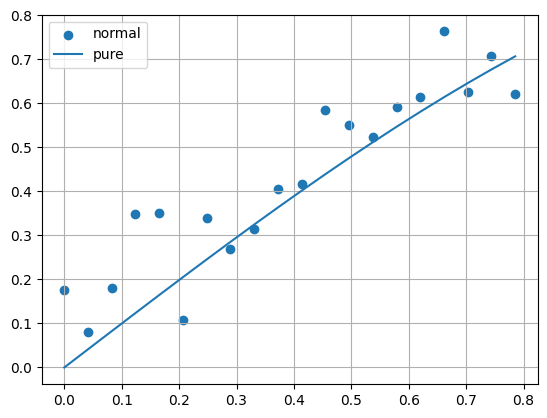

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(0)

def generate_sin(x, epsilon):
    # TODO: your code here
    func = np.sin(x) + epsilon
    return func


n_samples = 20


# TODO: create noisy function
mu, sigma = 0, 0.1
x = np.linspace(0, np.pi/4, num=n_samples)
y = generate_sin(x, np.random.normal(mu, sigma, n_samples))

# TODO: create true function
x_pure = np.linspace(0, np.pi/4, num=n_samples)
y_pure = generate_sin(x, 0)

# TODO: plot data, line
plt.scatter(x, y, label='normal')
plt.plot(x_pure, y_pure, label='pure')
plt.grid()
plt.legend()
plt.show()


## Question 2.2 -- Implementation of Linear Regression

Write a function that takes as input a list of $(x,y)$ pairs and returns the coefficients and residuals for a linear regression. Specifically, use the formula for $a$ and $b$ you found in Question 1.1.

*Hint: It may be better to create a new function that computes the sum of squared errors separately, taking $a$, $b$, and the $(x,y)$ pairs as inputs, and outputting a single float value.*

Compute and plot the line of best fit, along with the data and true function as you did above. Also print out the coefficients and the residuals (sum of square errors). How does this line compare to the true function?

---

You should get something similar to this:

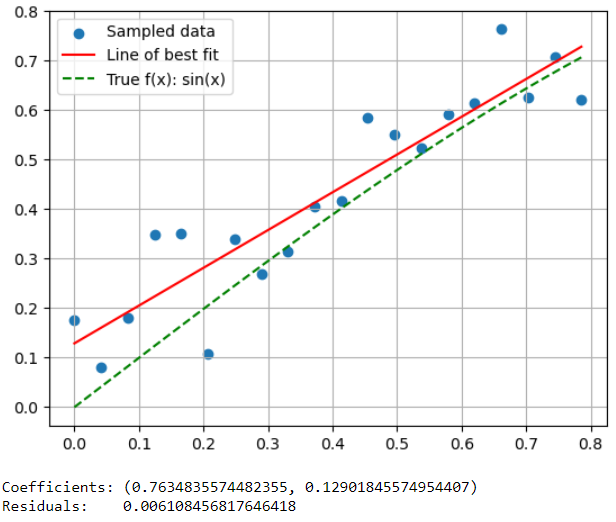

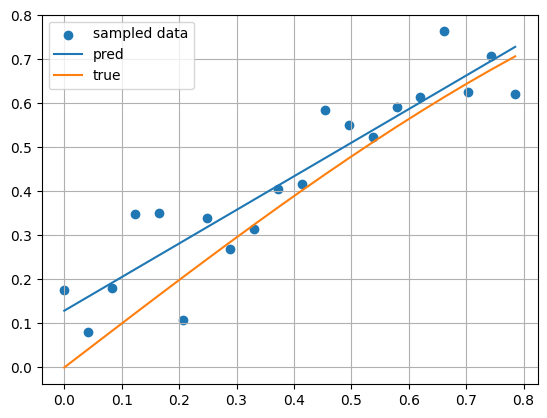

Coefficients: (0.7634835574482356, 0.12901845574954401)
Residuals:    0.006108456817646423


In [ ]:
def compute_sos(y_true, y_pred):
    # TODO: your code here
    difference = y_pred - y_true
    return sum(difference * difference)/len(y_true)


def lin_reg(xs, ys):
    # TODO: your code here
    b = ((sum((xs-np.average(xs))**2))**-1)*sum((xs-np.average(xs))*(ys-np.average(ys)))
    a = np.average(ys)-b*np.average(xs)
    return a, b

# TODO: generate line of best fit
a, b = lin_reg(x, y)
y_best = b * x + a
res = compute_sos(y,y_best)

# TODO: plot line of best fit, data, etc
plt.scatter(x, y, label='sampled data')
plt.plot(x, y_best, label='pred')
plt.plot(x_pure, y_pure, label='true')

# make it pretty
plt.grid()
plt.legend()
plt.show()

print("Coefficients:", (b, a))
print("Residuals:   ", res)

## Question 2.3 -- Comparison to existing model

Use numpy's `polyfit` functions to get the coefficients and residuals of the same data points. Plot a line using these coefficients, and plot the sampled data, your previous line of best fit, and the true function, as before, for reference. How does this compare to the function you derived for $a$ and $b$? Print out the values for $a$, $b$ and the residuals to compare them. What does this tell you about the way `polyfit` is implemented?

*Tip: Use a dashed/dotted line for the new function to make the comparison easier.*

*General tip: Don't overwrite your previous variables!*

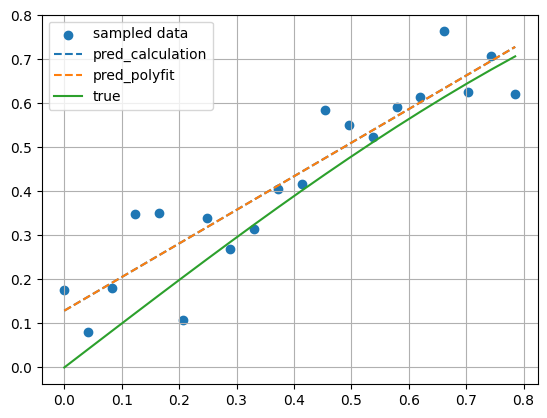

Coefficients:      (0.12901845574954401, 0.7634835574482356)
Residuals:         0.006108456817646423
Coefficients (np): (0.7634835574482354, 0.1290184557495442)
Residuals (np):    [0.00610846]


In [ ]:
# TODO: use np polyfit here
coef_np, res_np, _, _, _ = np.polyfit(x, y, 1, full=True)
poly1d_fn = np.poly1d(coef_np)
y_best_np = poly1d_fn(x)

# TODO: plot everything you need to
plt.scatter(x, y, label='sampled data')
plt.plot(x, y_best, label='pred_calculation', linestyle='dashed')
plt.plot(x, y_best_np, label='pred_polyfit', linestyle='dashed')
plt.plot(x_pure, y_pure, label='true')

plt.grid()
plt.legend()
plt.show()

# print results
print("Coefficients:     ", (a, b))
print("Residuals:        ", res)
print("Coefficients (np):", (coef_np[0], coef_np[1]))
print("Residuals (np):   ", res_np/len(x))

the regressions are the same, this means that polyfit uses the sum of squared error measurement to find the best possible model.

## Question 3 -- Test vs train loss

The mean of the residuals you computed above are often called the *training loss* or *training error* in machine learning lingo. In general, this phrase translates to the loss (difference between observed and predicted $y$ values in whatever metric you wish) over all data points available for you to train on (your *train/train set*). In our case, the 'metric' is the function you minimized, i.e. sum of squared errors.

In real life, you generally do not generate these data points -- you observe them from your experiments. However, you would want for your model to perform well on points that were *not* used to train your model as well -- this is called *generalization*. Thus, to test this, we use a *test set* -- a series of new observations. This will become important in following weeks when we use more complex models.

In general, we would want our test and train sets to have the same distributional properties, including the underlying function and the distribution of noise. Thus, for now, we *generate* a test set and see how our models 'perform' on it (again, we generally do not have access to the underlying function to generate datapoints with, we observe them through experiments). We compute the *test loss* or *test error* using the same metric as the training error (i.e. sum of square errors in this case).

Thus, for this exercise:
- Generate a new set of x-values in the range of $x\in[0,\pi/4]$. Compute a series of y-values using your `generate_sin` function, using the same $\epsilon$ and $n$ as before.
- Rewrite the function that computes the residuals to now compute the *mean* of the residuals. Thus, our loss function is the Mean Squared Error:
$$MSE = \frac{1}{N} \sum_{i=0}^{n}(y_i-\hat{y_i})^2$$
- Make a scatter plot of the train set and test set, and plot the two lines of best fit and the true function computed earlier on the train set. Don't forget labels. Does this seem to be of a similar distribution of the train set?
- Compute and print out the training and test losses.

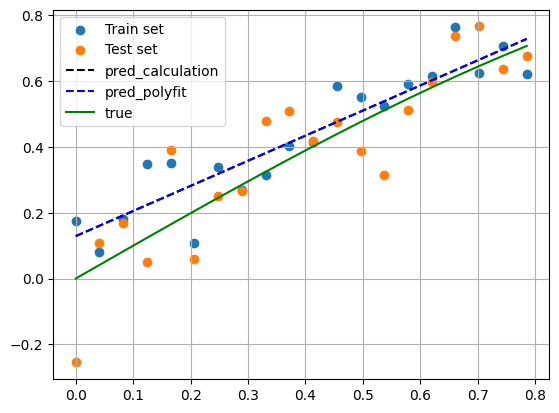

Coefficients:  (0.12901845574954401, 0.7634835574482356)
Train loss:    0.006108456817646423
Test loss:     0.018930491859273476


In [ ]:
def compute_mse(y_true, y_pred, a, b):
    # TODO: your code here
    return compute_sos(y_true, y_pred)

np.random.seed(0)
mu, sigma = 0, 0.1
x = np.linspace(0, np.pi/4, num=n_samples)
y = generate_sin(x, np.random.normal(mu, sigma, n_samples))

x_test = np.linspace(0, np.pi/4, num=n_samples)
mu2, sigma2 = 0, 0.1
y_test = generate_sin(x_test, np.random.normal(mu2, sigma2, n_samples))

plt.scatter(x, y, label="Train set")
plt.scatter(x_test, y_test, label="Test set")

#recomputing y_best for exercise 4
a, b = lin_reg(x, y)
y_best = b * x + a
#recomputing y_best_np for exercise 4
coef_np, res_np, _, _, _ = np.polyfit(x, y, 1, full=True)
poly1d_fn = np.poly1d(coef_np)
y_best_np = poly1d_fn(x)

# TODO: plot data, lines of best fit, true function, make it pretty
plt.plot(x, y_best, label='pred_calculation', linestyle='dashed', color='black')
plt.plot(x, y_best_np, label='pred_polyfit', linestyle='dashed', color='blue')
plt.plot(x_pure, y_pure, label='true', color='green')

plt.grid()
plt.legend()
plt.show()

#I may have made a mistake by thinking the MSE needs to be computed between regression
# and datapoint rather than between true_y and datapoint, but I assume that we don't know true_y here
# furthermore in the question 2.2, it also was computed between regression and datapoint
test_loss = compute_mse(y_best, y_test, a, b)
train_loss = compute_mse(y_best, y, a, b)

print("Coefficients: ", (a, b))
print("Train loss:   ", train_loss)
print("Test loss:    ", test_loss)

Which of the two losses *should* be better? Which is actually better? Why?

The error-loss of the the train set normally is lower than the error-loss of the test set. this is because the regression minimises the loss function of the train set and not the loss function of the test set. The regression knows the data of the train set and minimizes its error. Since the test data is random, it could be that the test data gives a lower loss than the train data. In this case the datapoints of the test data would be randomly generated closely to the regression line. In our scenario, we see that the train data has a lower MSE(0.0061) in comparison to our test data MSE(0.0189). This was expected. Lastly, a lower MSE is an indication of a better forecast.

## Question 4 -- Ablation study of sampling

Try out different values of $n$ and $\epsilon$. How does each one affect the performance of your linear models? (report your steps and general observations both for the train and test sets).

increasing our E gives a higher loss in both functions. This is expected because increasing the error of our obervations results in further distances from the regression line to our points. If we remove the random aspect of our errors and just choose a constant as an error, we see that our regression perfectly goes through all datapoints and thus the error-loss is 0 in both the test and train data sets. I observed this by means of experimenting in question 3.  

## Question 5.1 -- More data

Generate a training and test set using the `generate_sin` function you defined, but in the range $x\in[0,2\pi]$, $n=20$ and $\epsilon=0.2$. Plot the train and test sets (scatter plots) and true function in one plot.

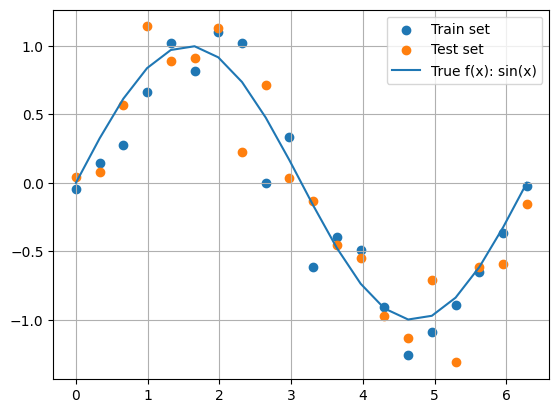

In [ ]:
# TODO: generate new data and plot
n_samples = 20
mu, sigma = 0, 0.2
x = np.linspace(0, np.pi*2, num=n_samples)
y_train = generate_sin(x, np.random.normal(mu, sigma, n_samples))
y_test = generate_sin(x, np.random.normal(mu, sigma, n_samples))

x_pure = np.linspace(0, np.pi*2, num=n_samples)
y_pure = generate_sin(x, 0)

plt.scatter(x,y_train, label="Train set")
plt.scatter(x,y_test, label="Test set")

plt.plot(x,y_pure, label="True f(x): sin(x)")
plt.grid()
plt.legend()
plt.show()

## Question 5.2 -- Polynomial fitting

Now, we examine the flexibility of the model we use and the performance on the training and test sets. 'Flexibility' is generally ill-defined, but intuitively, *a learning algorithm $A$ is more flexible than another learning algorithm $B$ if $A$ can fit its computed models $\hat{f}$ more closely to the training data than $B$ can do.* (quote from Jaeger, 2022, pg 11). For example, a quadratic function is more flexible (in theory) than a linear one, since a quadratic function can model data *at least* as well as linear ones. Specifically, the set of all linear functions is a subset of quadratic ones (by setting the quadratic coefficient to zero).

- Using the datapoints you made above with $x\in[0,2\pi]$, compute the best fitting polynomials from degrees $d\in\{1,...,20\}$.
- Save the corresponding train and test losses, and the resulting coefficients. Don't forget to change the function that computes the mean squared errors if required (perhaps `np.polyval` may help here?). Also, don't forget to create your model based _only_ on your train set.

In [ ]:
poly_size = 20
trainloss = np.arange(poly_size, dtype = float)
testloss = np.arange(poly_size, dtype = float)
for i in range(poly_size):
    coef_np, res_np, _, _, _ = np.polyfit(x, y_train, i+1, full=True)
    poly1d_fn = np.poly1d(coef_np)
    y_best_np = poly1d_fn(x)
    trainloss[i] = compute_mse(y_best_np, y_train, a, b)
    testloss[i] = compute_mse(y_best_np, y_test, a, b)

print(trainloss)
print(testloss)

[0.29185403 0.29125845 0.0512974  0.05060223 0.03880825 0.03685231
 0.03596437 0.03382071 0.03187887 0.02946651 0.02946576 0.02496806
 0.0249537  0.02489085 0.02487198 0.01889151 0.01508703 0.01464998
 0.01364568 0.01394299]
[0.25908992 0.25755459 0.05037127 0.05101729 0.05366807 0.05287414
 0.05102919 0.05713994 0.06106734 0.06212008 0.06213614 0.06884411
 0.0683275  0.06794115 0.0668807  0.06980566 0.0695359  0.07066297
 0.07665338 0.0751506 ]


**Bonus**: You may encounter this warning (if you don't, try increasing the range of polynomial degrees):

`RankWarning: Polyfit may be poorly conditioned`

What does this mean?

I did not get this message (even when setting polynoial to 150 terms), which leads me to believe I did something wrong. This message basically warns the user for overfitting. When we increase the number of terms, the model gets more freedom to fit itself perfectly to the data and not to the data generating process. Thus it now learns the data instead of the patterns. This is not preferable and thus the system now (should) warn us that the model could be vary bad.

## Question 5.3 -- Analysis
Plot the lines of best fit for $d=\{1,2,3,5,10,20\}$. These should look like the plots shown in Lecture 1 under section *Polynomial Regression*. You may also show this in multiple plots as long as you have the reference plots for each (the train and test data and the true underlying function).

0.2918540266611653
0.2590899227507316


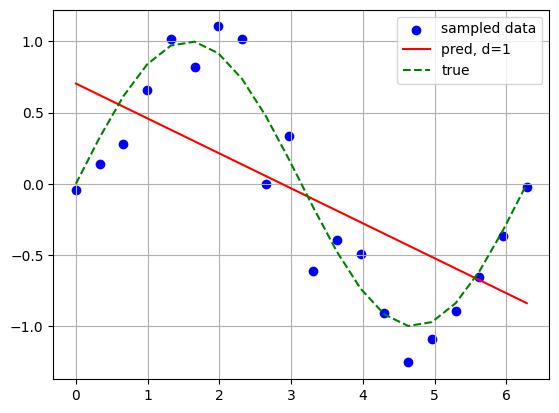

0.2912584479823225
0.2575545928503321


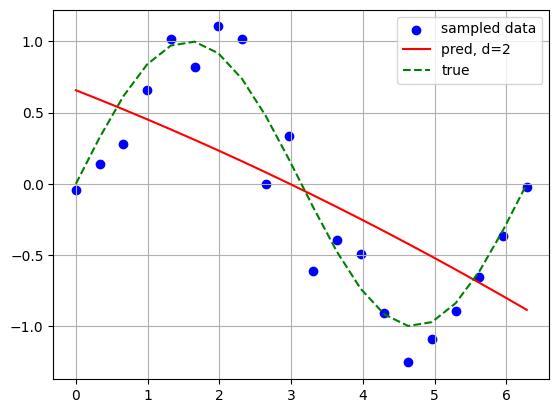

0.05129739740451381
0.05037127153905265


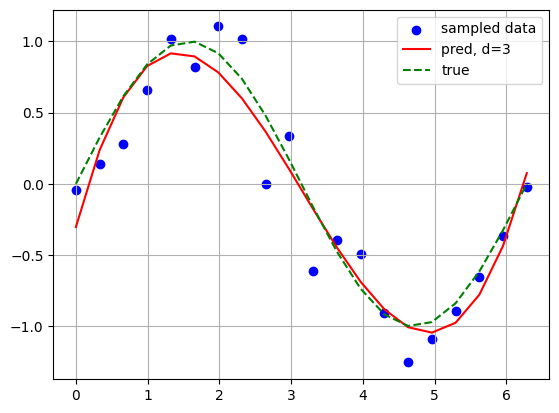

0.03880825118143294
0.05366806599586451


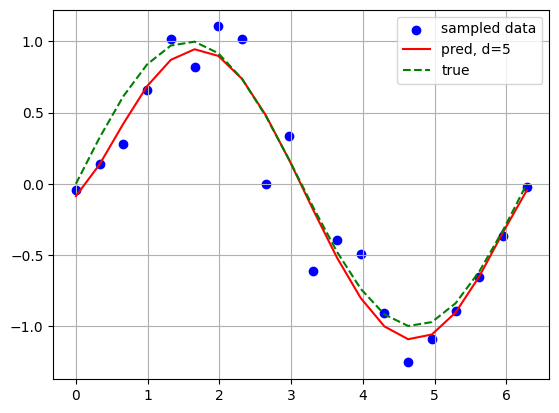

0.02946651279804992
0.06212008039964271


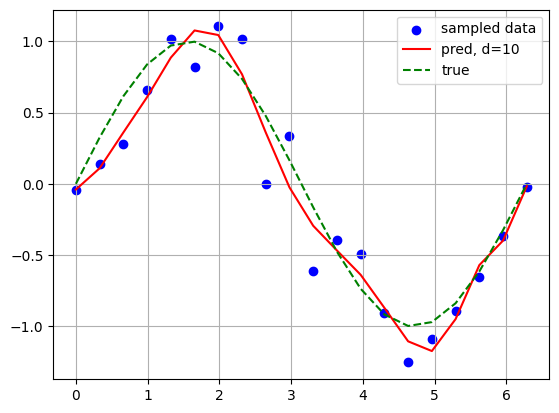

0.013942990572709146
0.07515059722210779


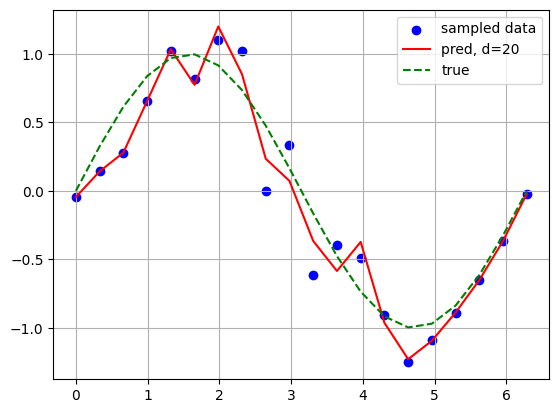

In [ ]:
coef_np, res_np, _, _, _ = np.polyfit(x, y_train, 1, full=True)
poly1d_fn = np.poly1d(coef_np)
y_best_np = poly1d_fn(x)
print(compute_mse(y_best_np, y_train, a, b))
print(compute_mse(y_best_np, y_test, a, b))
plt.scatter(x, y_train, label='sampled data', color = 'blue')
plt.plot(x, y_best_np, label='pred, d=1', color = 'red')
plt.plot(x, y_pure, label='true', color='green', linestyle='dashed')
plt.grid()
plt.legend()
plt.show()

coef_np, res_np, _, _, _ = np.polyfit(x, y_train, 2, full=True)
poly1d_fn = np.poly1d(coef_np)
y_best_np = poly1d_fn(x)
print(compute_mse(y_best_np, y_train, a, b))
print(compute_mse(y_best_np, y_test, a, b))
plt.scatter(x, y_train, label='sampled data', color = 'blue')
plt.plot(x, y_best_np, label='pred, d=2', color = 'red')
plt.plot(x, y_pure, label='true', color='green', linestyle='dashed')
plt.grid()
plt.legend()
plt.show()

coef_np, res_np, _, _, _ = np.polyfit(x, y_train, 3, full=True)
poly1d_fn = np.poly1d(coef_np)
y_best_np = poly1d_fn(x)
print(compute_mse(y_best_np, y_train, a, b))
print(compute_mse(y_best_np, y_test, a, b))
plt.scatter(x, y_train, label='sampled data', color = 'blue')
plt.plot(x, y_best_np, label='pred, d=3', color = 'red')
plt.plot(x, y_pure, label='true', color='green', linestyle='dashed')
plt.grid()
plt.legend()
plt.show()

coef_np, res_np, _, _, _ = np.polyfit(x, y_train, 5, full=True)
poly1d_fn = np.poly1d(coef_np)
y_best_np = poly1d_fn(x)
print(compute_mse(y_best_np, y_train, a, b))
print(compute_mse(y_best_np, y_test, a, b))
plt.scatter(x, y_train, label='sampled data', color = 'blue')
plt.plot(x, y_best_np, label='pred, d=5', color = 'red')
plt.plot(x, y_pure, label='true', color='green', linestyle='dashed')
plt.grid()
plt.legend()
plt.show()

coef_np, res_np, _, _, _ = np.polyfit(x, y_train, 10, full=True)
poly1d_fn = np.poly1d(coef_np)
y_best_np = poly1d_fn(x)
print(compute_mse(y_best_np, y_train, a, b))
print(compute_mse(y_best_np, y_test, a, b))
plt.scatter(x, y_train, label='sampled data', color = 'blue')
plt.plot(x, y_best_np, label='pred, d=10', color = 'red')
plt.plot(x, y_pure, label='true', color='green', linestyle='dashed')
plt.grid()
plt.legend()
plt.show()

coef_np, res_np, _, _, _ = np.polyfit(x, y_train, 20, full=True)
poly1d_fn = np.poly1d(coef_np)
y_best_np = poly1d_fn(x)
print(compute_mse(y_best_np, y_train, a, b))
print(compute_mse(y_best_np, y_test, a, b))
plt.scatter(x, y_train, label='sampled data', color = 'blue')
plt.plot(x, y_best_np, label='pred, d=20', color = 'red')
plt.plot(x, y_pure, label='true', color='green', linestyle='dashed')
plt.grid()
plt.legend()
plt.show()

Now plot the MSE losses versus the flexibility (degree of the best fitting functions) for both the test and train sets. Again, a similar plot can be found in Lecture 1 under *Overfitting and Underfitting*.

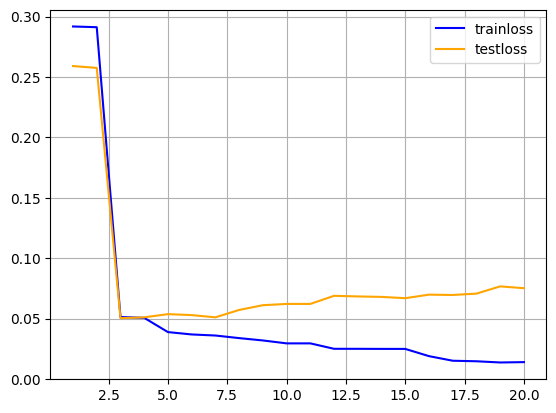

In [ ]:
q = 1+np.arange(poly_size)
plt.plot(q, trainloss, label='trainloss', color = 'blue')
plt.plot(q, testloss, label='testloss', color='orange')
plt.grid()
plt.legend()
plt.show()

## Open Questions (Question 6)
1. Where do the polynomial models start to overfit? How can you tell?
2. What model fits the best to the training data? What model fits the best to the underlying function (visually, according to your intuition about the plots)? Are they the same?
4. Try increasing the number of training points to $n=200$. At what point does overfitting start now?
5. In general, does increasing the number of training points always allow for more flexible models of the real world? Why/why not?

1. In order to find where the polynomials start to overfit, we should look at when the testloss does not start decreasing anymore. We see that when choosing d=3, the polynomial has a low testloss and when choosing 4 or higher, the model's testloss stays rougly the same or even goes up. This shows that the model is only getting more complex but has no positive effect on its performance anymore. thus when d=4, the model starts overfitting.
2. visually, I think the regression with d=5 looks the most like our true function, but it does not have any significant benefits over the model with d=3 which looked best with our training data.
3. Only at d=20 we see that the model starts to shape itself to our data instead of to our dgp. We thus see that overfitting now starts from a higher polynomial.
4. No, the flexibility of a model is determined by the specification of the model, not by its (number of) trainingpoints. for example a polynomial with 3 terms is always more flexible than a polynomial of 2 terms irregarding the trainingpoints.